# NsurommaUoG Team - Zindi UmojaHack Fire Hotspot

## Setup
 
The codes below were run on Google Colab: a cloud-based platform for collaboratory works in machine learning and computing.
Loading the data for the competition.

In [35]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
import pandas as pd
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
import seaborn as sns

In [37]:
train = pd.read_csv('/content/drive/My Drive/zindi/train.csv', parse_dates=['date'])
train.head(10)

,ID,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,climate_soil,climate_srad,climate_swe,climate_tmmn,climate_tmmx,climate_vap,climate_vpd,climate_vs,elevation,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation
0,0_2000-04-01,0,2000-04-01,25.447,5.296,0.003688,1250.622712,0.0,-178.916305,1250.622712,158.387765,8.000000,498.913776,2143.430034,0.0,206.935453,323.873675,2508.795159,115.989282,129.825024,590.564102,0.0,0.0,0.350169,0.0,0.649524,0.0,0.000307,0.0,0.0,2.214262,0.198996
1,1_2000-04-01,1,2000-04-01,25.669,5.293,0.000000,1238.019166,0.0,-150.779947,1238.019166,164.645065,8.104576,590.346191,2132.253953,0.0,204.835170,321.838884,2500.432319,112.619789,129.471370,611.544277,0.0,0.0,0.429049,0.0,0.570644,0.0,0.000307,0.0,0.0,3.833042,0.188071
2,2_2000-04-01,2,2000-04-01,25.443,5.074,0.000000,1240.449964,0.0,-200.503858,1240.449964,163.699542,8.027851,536.613938,2139.632626,0.0,207.001206,321.846757,2519.259344,112.378707,127.550639,594.188987,0.0,0.0,0.238300,0.0,0.761700,0.0,0.000000,0.0,0.0,1.927303,0.211730
3,3_2000-04-01,3,2000-04-01,25.665,5.070,0.000000,1229.240077,0.0,-177.011032,1229.240077,172.996043,8.820002,648.271615,2125.206979,0.0,204.127473,319.348123,2493.392613,109.132390,131.703082,645.362481,0.0,0.0,0.488146,0.0,0.511854,0.0,0.000000,0.0,0.0,1.878281,0.215403
4,4_2000-04-01,4,2000-04-01,25.886,5.067,0.000307,1224.093679,0.0,-153.256111,1224.093679,178.396749,9.000000,719.423119,2114.709813,0.0,203.295123,318.639735,2487.984467,108.161469,133.354846,660.372381,0.0,0.0,0.322243,0.0,0.677757,0.0,0.000000,0.0,0.0,1.968818,0.199975
5,5_2000-04-01,5,2000-04-01,26.108,5.063,0.000000,1215.375285,0.0,-137.379480,1215.375285,180.862160,9.000000,774.345919,2110.314875,0.0,202.345200,317.789165,2485.139638,106.636462,129.236606,674.138471,0.0,0.0,0.320245,0.0,0.679755,0.0,0.000000,0.0,0.0,1.878478,0.195985
6,6_2000-04-01,6,2000-04-01,26.329,5.059,0.000000,1226.289328,0.0,-133.668514,1226.289328,181.480607,9.000000,799.837268,2105.426162,0.0,205.498675,321.151048,2508.949651,110.985305,130.967960,635.778284,0.0,0.0,0.320425,0.0,0.679575,0.0,0.000000,0.0,0.0,1.889593,0.213340
7,7_2000-04-01,7,2000-04-01,26.550,5.055,0.000000,1221.553861,0.0,-136.422001,1221.553861,181.731956,9.000000,830.901885,2109.773748,0.0,203.788159,319.306713,2499.665546,108.117209,130.840399,645.280292,0.0,0.0,0.491759,0.0,0.508241,0.0,0.000000,0.0,0.0,1.898939,0.237743
8,8_2000-04-01,8,2000-04-01,26.771,5.051,0.000000,1217.142668,0.0,-137.683723,1217.142668,180.821695,9.000963,832.245124,2116.537082,0.0,202.453287,317.916326,2491.688298,106.209006,128.061040,653.298836,0.0,0.0,0.455180,0.0,0.544820,0.0,0.000000,0.0,0.0,1.231987,0.250554
9,9_2000-04-01,9,2000-04-01,26.991,5.047,0.000000,1226.507805,0.0,-138.340418,1226.507805,179.323367,9.000000,811.208213,2116.226705,0.0,202.999159,318.389769,2485.308718,107.890130,134.738232,662.962592,0.0,0.0,0.533763,0.0,0.466237,0.0,0.000000,0.0,0.0,2.875994,0.246241


In [38]:
train.tail()

,ID,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,climate_soil,climate_srad,climate_swe,climate_tmmn,climate_tmmx,climate_vap,climate_vpd,climate_vs,elevation,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation
626639,3816_2013-12-01,3816,2013-12-01,29.075,-13.214,0.0,1135.610247,0.0,147.779270,1135.610247,336.312132,16.817668,3013.975618,1786.251355,0.0,169.001885,269.529682,1988.025324,76.315665,274.408245,1285.573771,0.0,0.0,0.008885,0.0,0.988557,0.0,0.002558,0.0,0.0,14.813819,0.313800
626640,3817_2013-12-01,3817,2013-12-01,29.298,-13.202,0.0,1143.499063,0.0,130.235363,1143.499063,319.218384,16.007963,2602.787822,1787.458197,0.0,169.445902,269.802225,1982.640281,77.402108,280.594028,1290.924375,0.0,0.0,0.006661,0.0,0.993339,0.0,0.000000,0.0,0.0,14.815366,0.320290
626641,3818_2013-12-01,3818,2013-12-01,29.522,-13.189,0.0,1139.045620,0.0,115.538994,1139.045620,308.399789,15.429342,2371.946406,1783.537352,0.0,166.299050,265.625425,1927.523044,76.715844,283.366600,1393.879019,0.0,0.0,0.019980,0.0,0.980020,0.0,0.000000,0.0,0.0,15.981201,0.317855
626642,3819_2013-12-01,3819,2013-12-01,29.745,-13.176,0.0,1141.168210,0.0,-7.484351,1141.168210,296.678350,14.948658,2150.079475,1783.147579,0.0,166.350604,265.400539,1922.712343,77.015239,285.299027,1386.865940,0.0,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.0,15.206220,0.282233
626643,3820_2013-12-01,3820,2013-12-01,29.758,-13.394,0.0,1160.088274,0.0,-66.498403,1160.088274,287.999527,14.461721,2005.585611,1799.816826,0.0,165.003195,262.991362,1867.428470,79.182582,291.762513,1495.411564,0.0,0.0,0.000000,0.0,0.999986,0.0,0.000014,0.0,0.0,15.574830,0.264007


# New Section

In [39]:
test = pd.read_csv('/content/drive/My Drive/zindi/test .csv', parse_dates=['date'])
test.head(10)

,ID,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,climate_soil,climate_srad,climate_swe,climate_tmmn,climate_tmmx,climate_vap,climate_vpd,climate_vs,elevation,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation
0,0_2014-01-01,0,2014-01-01,25.447,5.296,0,142.756021,1217.926180,-953.401012,1360.571291,1.000000,0.0,355.593690,2349.499157,0.0,187.541787,332.578998,2542.124518,111.013969,156.563945,590.564102,0.0,0.0,0.430648,0.0,0.569045,0.0,0.000307,0.0,0.0,2.773423,0.000457
1,1_2014-01-01,1,2014-01-01,25.669,5.293,0,154.836847,1193.866315,-961.703043,1348.688788,1.000000,0.0,382.206636,2340.597389,0.0,185.895903,330.826066,2551.085649,106.576545,158.165429,611.544277,0.0,0.0,0.494624,0.0,0.505068,0.0,0.000307,0.0,0.0,4.697883,0.000129
2,2_2014-01-01,2,2014-01-01,25.443,5.074,0,127.790933,1223.640222,-962.435857,1351.521823,1.000000,0.0,318.078852,2351.867856,0.0,188.441645,330.077285,2551.183265,107.104292,153.257656,594.188987,0.0,0.0,0.288343,0.0,0.711657,0.0,0.000000,0.0,0.0,2.488614,0.000398
3,3_2014-01-01,3,2014-01-01,25.665,5.070,0,136.924571,1201.258784,-961.326298,1338.120278,1.000000,0.0,339.386497,2348.509414,0.0,185.393692,326.942319,2539.815326,101.962346,155.518048,645.362481,0.0,0.0,0.492103,0.0,0.507897,0.0,0.000000,0.0,0.0,2.439959,0.000158
4,4_2014-01-01,4,2014-01-01,25.886,5.067,0,144.278146,1197.831547,-959.248284,1342.118844,0.998555,0.0,358.043829,2341.881156,0.0,186.275015,327.839976,2549.462252,102.743046,159.865021,660.372381,0.0,0.0,0.333855,0.0,0.666145,0.0,0.000000,0.0,0.0,2.546723,0.000153
5,5_2014-01-01,5,2014-01-01,26.108,5.063,0,155.077190,1192.204003,-964.570538,1347.227256,0.230493,0.0,384.467817,2344.524032,0.0,186.079708,327.798873,2560.963562,101.283591,167.324344,674.138471,0.0,0.0,0.393942,0.0,0.606058,0.0,0.000000,0.0,0.0,2.440192,0.000770
6,6_2014-01-01,6,2014-01-01,26.329,5.059,0,165.673573,1184.368947,-981.082390,1350.036256,0.000000,0.0,415.750783,2334.210552,0.0,187.825825,330.264635,2601.478921,101.857143,168.074560,635.778284,0.0,0.0,0.387383,0.0,0.612617,0.0,0.000000,0.0,0.0,2.430313,0.002025
7,7_2014-01-01,7,2014-01-01,26.550,5.055,0,170.040471,1166.924343,-1000.463672,1336.968776,0.000000,0.0,436.671670,2327.093431,0.0,185.610424,328.542933,2600.920620,98.105200,167.426924,645.280292,0.0,0.0,0.605043,0.0,0.394957,0.0,0.000000,0.0,0.0,2.385793,0.004801
8,8_2014-01-01,8,2014-01-01,26.771,5.051,0,169.763785,1163.786179,-1004.548760,1333.495666,0.000000,0.0,441.003251,2329.417529,0.0,184.288587,327.730075,2599.301108,96.234048,167.554659,653.298836,0.0,0.0,0.582741,0.0,0.417259,0.0,0.000000,0.0,0.0,1.592050,0.005471
9,9_2014-01-01,9,2014-01-01,26.991,5.047,0,167.680476,1174.272094,-1017.399976,1341.998919,0.000000,0.0,441.063881,2328.149256,0.0,184.785903,328.930355,2594.235711,98.768972,170.993156,662.962592,0.0,0.0,0.637296,0.0,0.362704,0.0,0.000000,0.0,0.0,3.734072,0.008663


In [40]:
test.tail()

,ID,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,climate_soil,climate_srad,climate_swe,climate_tmmn,climate_tmmx,climate_vap,climate_vpd,climate_vs,elevation,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation
137551,3816_2016-12-01,3816,2016-12-01,29.075,-13.214,0,1106.666078,0.0,701.364429,1106.666078,413.977385,169.228033,3466.773380,1902.439812,0.0,167.149706,267.704711,2093.727562,62.497644,222.457715,1285.573771,0.0,0.0,0.003381,0.0,0.994776,0.0,0.001843,0.0,0.0,14.813819,0.302496
137552,3817_2016-12-01,3817,2016-12-01,29.298,-13.202,0,1110.827869,0.0,712.703513,1110.827869,408.976932,150.189461,3253.502342,1903.454684,0.0,167.219672,267.644496,2091.181030,63.011710,229.476347,1290.924375,0.0,0.0,0.001844,0.0,0.998156,0.0,0.000000,0.0,0.0,14.815366,0.315196
137553,3818_2016-12-01,3818,2016-12-01,29.522,-13.189,0,1104.297877,0.0,728.047262,1104.297877,410.514014,154.363551,3050.135921,1899.752785,0.0,163.970212,263.278879,2036.237246,62.006802,233.040929,1393.879019,0.0,0.0,0.007992,0.0,0.992008,0.0,0.000000,0.0,0.0,15.981201,0.312253
137554,3819_2016-12-01,3819,2016-12-01,29.745,-13.176,0,1103.605791,0.0,730.454929,1103.605791,409.563474,149.969406,2927.227289,1899.357051,0.0,163.851131,262.915016,2034.632399,61.621615,235.832610,1386.865940,0.0,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.0,15.206220,0.316645
137555,3820_2016-12-01,3820,2016-12-01,29.758,-13.394,0,1115.367057,0.0,741.525973,1115.367057,407.668205,156.901668,2823.415454,1911.232635,0.0,162.095965,260.053958,1979.070169,63.328364,241.177730,1495.411564,0.0,0.0,0.000000,0.0,0.998742,0.0,0.001258,0.0,0.0,15.574830,0.329992


In [41]:
# More information about the test data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137556 entries, 0 to 137555
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ID                  137556 non-null  object        
 1   area                137556 non-null  int64         
 2   date                137556 non-null  datetime64[ns]
 3   lat                 137556 non-null  float64       
 4   lon                 137556 non-null  float64       
 5   burn_area           137556 non-null  int64         
 6   climate_aet         137556 non-null  float64       
 7   climate_def         137556 non-null  float64       
 8   climate_pdsi        137556 non-null  float64       
 9   climate_pet         137556 non-null  float64       
 10  climate_pr          137556 non-null  float64       
 11  climate_ro          137556 non-null  float64       
 12  climate_soil        137556 non-null  float64       
 13  climate_srad        137556 no

In [42]:
# Checking for null values
test.isnull().sum

<bound method DataFrame.sum of            ID   area   date  ...  landcover_8  population_density  precipitation
0       False  False  False  ...        False               False          False
1       False  False  False  ...        False               False          False
2       False  False  False  ...        False               False          False
3       False  False  False  ...        False               False          False
4       False  False  False  ...        False               False          False
...       ...    ...    ...  ...          ...                 ...            ...
137551  False  False  False  ...        False               False          False
137552  False  False  False  ...        False               False          False
137553  False  False  False  ...        False               False          False
137554  False  False  False  ...        False               False          False
137555  False  False  False  ...        False               False          Fal

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626644 entries, 0 to 626643
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ID                  626644 non-null  object        
 1   area                626644 non-null  int64         
 2   date                626644 non-null  datetime64[ns]
 3   lat                 626644 non-null  float64       
 4   lon                 626644 non-null  float64       
 5   burn_area           626644 non-null  float64       
 6   climate_aet         626644 non-null  float64       
 7   climate_def         626644 non-null  float64       
 8   climate_pdsi        626644 non-null  float64       
 9   climate_pet         626644 non-null  float64       
 10  climate_pr          626644 non-null  float64       
 11  climate_ro          626644 non-null  float64       
 12  climate_soil        626644 non-null  float64       
 13  climate_srad        626644 no

In [44]:
train.isnull().sum()

ID                        0
area                      0
date                      0
lat                       0
lon                       0
burn_area                 0
climate_aet               0
climate_def               0
climate_pdsi              0
climate_pet               0
climate_pr                0
climate_ro                0
climate_soil              0
climate_srad              0
climate_swe               0
climate_tmmn              0
climate_tmmx              0
climate_vap               0
climate_vpd               0
climate_vs                0
elevation                 0
landcover_0               0
landcover_1               0
landcover_2               0
landcover_3               0
landcover_4               0
landcover_5               0
landcover_6               0
landcover_7               0
landcover_8               0
population_density    19516
precipitation             0
dtype: int64

# EDA + Feature Engineering

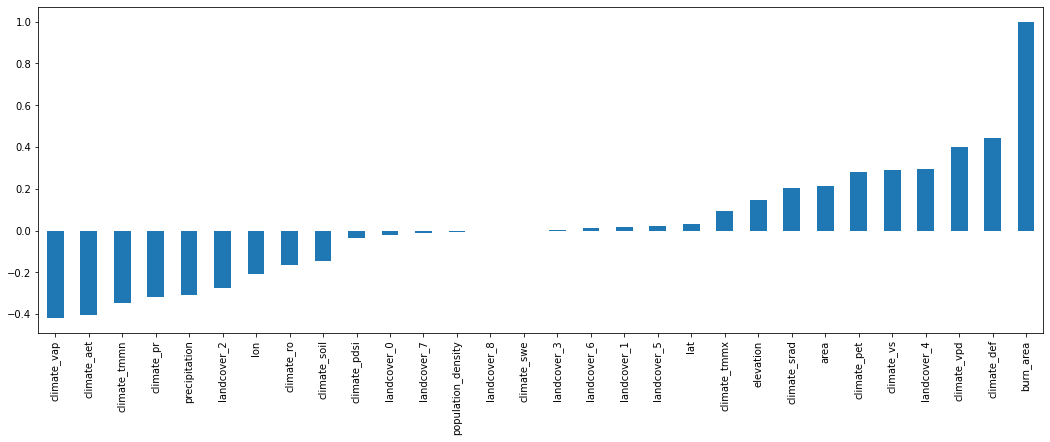

In [45]:
# Look at correlation with target
train.corr()['burn_area'].sort_values().plot(kind='bar', figsize=(18, 6))

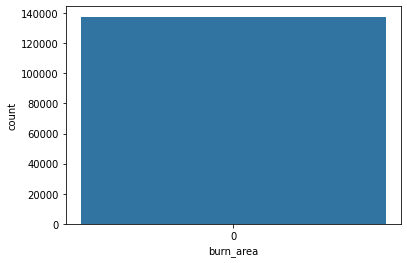

In [46]:
sns.countplot(test['burn_area'])

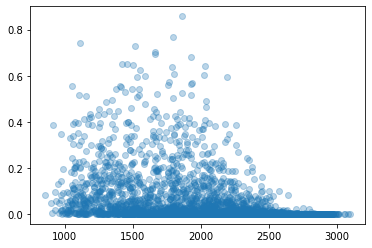

In [47]:
# Look at some scatter plots (only plotting for a subset of data to keep things fast)
sample = train.sample(10000)
plt.scatter(sample['climate_vap'], sample['burn_area'], alpha=0.3)

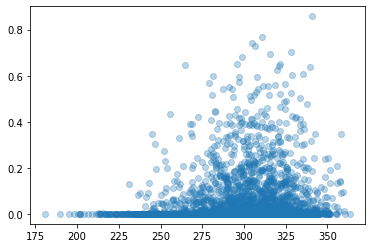

In [48]:
# Higher temp -> more fires it looks like
plt.scatter(sample['climate_tmmx'], sample['burn_area'], alpha=0.3)

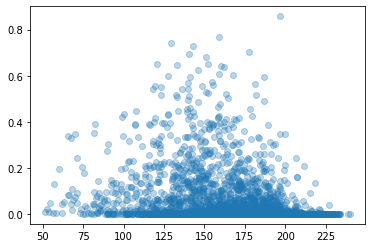

In [49]:
# Lower temp -> less fires it looks like
plt.scatter(sample['climate_tmmn'], sample['burn_area'], alpha=0.3)

##  Adding date features

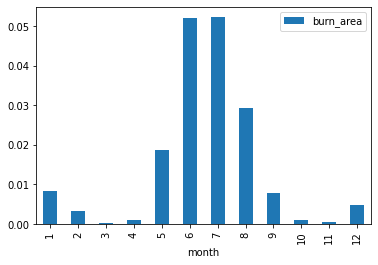

In [50]:
# Date variables
train['month'] = train.date.dt.month
train['year'] = train.date.dt.year

# Plotting mean burn_area for each month - very strong mid-year peak (dry season)
train.groupby('month').mean().reset_index().plot(y='burn_area', x='month', kind='bar')

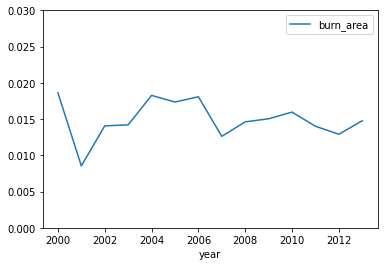

In [51]:
# Plot trend year-on-year
train.groupby('year').mean().reset_index().plot(y='burn_area', x='year', ylim=(0, 0.03))

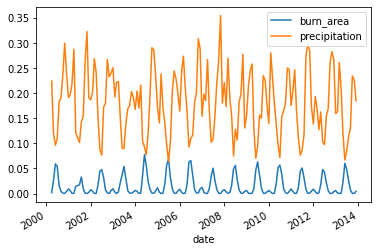

In [52]:
# Let's plot precipitation and burn area on the same plot - note the inverse relationship, and the strong periodic component to both.
ax = train.groupby('date').mean().reset_index().plot(y='burn_area', x='date')
train.groupby('date').mean().reset_index().plot(y='precipitation', x='date', ax=ax)

# Data Split for Validation

We don't want to just split randomly - this would give us artificially high scores. Instead, let's use the last 3 years of the dataset for validation to more closely match the test configuration.

In [53]:
train_all = train.copy().dropna()
train = train_all.loc[train_all.date < '2011-01-01']
valid = train_all.loc[train_all.date > '2011-01-01']
print(train.shape, valid.shape)

(473856, 34) (129570, 34)


# Simple Model

In [54]:
# Define input and output columns
in_cols = train.columns[6:]
target_col = 'burn_area'
in_cols

Index(['climate_aet', 'climate_def', 'climate_pdsi', 'climate_pet',
       'climate_pr', 'climate_ro', 'climate_soil', 'climate_srad',
       'climate_swe', 'climate_tmmn', 'climate_tmmx', 'climate_vap',
       'climate_vpd', 'climate_vs', 'elevation', 'landcover_0', 'landcover_1',
       'landcover_2', 'landcover_3', 'landcover_4', 'landcover_5',
       'landcover_6', 'landcover_7', 'landcover_8', 'population_density',
       'precipitation', 'month', 'year'],
      dtype='object')

In [55]:
# Get our X and y training and validation sets ready
X_train, y_train = train[in_cols], train[target_col]
X_valid, y_valid = valid[in_cols], valid[target_col]

# Create and fit the model
model = RidgeCV()
model.fit(X_train, y_train)

# Make predictions
preds = model.predict(X_valid)

# Score
mean_squared_error(y_valid, preds)**0.5 # RMSE - should match Zindi score. Lower is better

0.050251040694275946

# Random Forest Regression Model

In [56]:
rModel = RandomForestRegressor(n_estimators=10, random_state=0)
rModel.fit( X_train, y_train)

model_score = rModel.score(X_valid, y_valid)

prediction = rModel.predict(X_valid)


print("mean squared error score: ", mean_squared_error(y_valid, prediction )** 0.5)

#print("r2 score: ", r2_score(y_valid, prediction))




mean squared error score:  0.03618415927682415


# Visualizing Predictions

In [57]:
# Look at the sample submission file
ss = pd.read_csv('/content/drive/My Drive/zindi/SampleSubmission (1).csv')
ss.head()

,ID,Prediction
0,0_2014-01-01,0
1,1_2014-01-01,0
2,2_2014-01-01,0
3,3_2014-01-01,0
4,4_2014-01-01,0


In [58]:
# And the test data
test.head()

,ID,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,climate_soil,climate_srad,climate_swe,climate_tmmn,climate_tmmx,climate_vap,climate_vpd,climate_vs,elevation,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation
0,0_2014-01-01,0,2014-01-01,25.447,5.296,0,142.756021,1217.926180,-953.401012,1360.571291,1.000000,0.0,355.593690,2349.499157,0.0,187.541787,332.578998,2542.124518,111.013969,156.563945,590.564102,0.0,0.0,0.430648,0.0,0.569045,0.0,0.000307,0.0,0.0,2.773423,0.000457
1,1_2014-01-01,1,2014-01-01,25.669,5.293,0,154.836847,1193.866315,-961.703043,1348.688788,1.000000,0.0,382.206636,2340.597389,0.0,185.895903,330.826066,2551.085649,106.576545,158.165429,611.544277,0.0,0.0,0.494624,0.0,0.505068,0.0,0.000307,0.0,0.0,4.697883,0.000129
2,2_2014-01-01,2,2014-01-01,25.443,5.074,0,127.790933,1223.640222,-962.435857,1351.521823,1.000000,0.0,318.078852,2351.867856,0.0,188.441645,330.077285,2551.183265,107.104292,153.257656,594.188987,0.0,0.0,0.288343,0.0,0.711657,0.0,0.000000,0.0,0.0,2.488614,0.000398
3,3_2014-01-01,3,2014-01-01,25.665,5.070,0,136.924571,1201.258784,-961.326298,1338.120278,1.000000,0.0,339.386497,2348.509414,0.0,185.393692,326.942319,2539.815326,101.962346,155.518048,645.362481,0.0,0.0,0.492103,0.0,0.507897,0.0,0.000000,0.0,0.0,2.439959,0.000158
4,4_2014-01-01,4,2014-01-01,25.886,5.067,0,144.278146,1197.831547,-959.248284,1342.118844,0.998555,0.0,358.043829,2341.881156,0.0,186.275015,327.839976,2549.462252,102.743046,159.865021,660.372381,0.0,0.0,0.333855,0.0,0.666145,0.0,0.000000,0.0,0.0,2.546723,0.000153


In [59]:
# So we need to predict the burn area for each row in test. 

# Add the same features to test as we did to train:
test['month'] = test.date.dt.month
test['year'] = test.date.dt.year

# Get predictions
preds = rModel.predict(test[in_cols].fillna(0)) # fillna(0) here could be improved by examining the missing data and filling more appropriately.

# Add to submission dataframe
ss['Prediction'] = preds

# View
ss.head()

,ID,Prediction
0,0_2014-01-01,0.231968
1,1_2014-01-01,0.145451
2,2_2014-01-01,0.430379
3,3_2014-01-01,0.192679
4,4_2014-01-01,0.290858


In [60]:
ss.tail()

,ID,Prediction
137551,3816_2016-12-01,0.000021
137552,3817_2016-12-01,0.000018
137553,3818_2016-12-01,0.000602
137554,3819_2016-12-01,0.052119
137555,3820_2016-12-01,0.000018


In [0]:
#test.mean().reset_index().plot(y='burn_area', x='preds', kind='bar')

In [0]:
# Save ready for submission:
ss.to_csv('/content/drive/My Drive/zindi/SampleSubmissionOG.csv', index=False)